In [ ]:
%reset

In [1]:
host = 'SYNPAI' #'habanero'
if host == 'habanero':
    resultdir ='/rigel/issa/users/Tahereh/Results/'
    neuraldir = '/rigel/issa/users/Tahereh/models/neural_features/'
    modeldir = '/rigel/issa/users/Tahereh/models/'
    datadir = '/rigel/issa/users/Tahereh/Data/DiCarlo/'
elif host =='Mac':
    resultdir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/'
    neuraldir = '/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/neural_features/'
    modeldir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/'
    datadir = '/Users/Tahereh/Documents/Data/DiCarlo'
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Neural-Dynamics/'
    neuralfeaturesdir = '/home/tahereh/Documents/Research/features/neural_features/'
    modeldir =  '/home/tahereh/Documents/Research/features/'
    datadir =  '/home/tahereh/Documents/Research/Data/DiCarlo/'
    # %pylab inline
    # pylab.rcParams['xtick.color'] = 'white'
    # pylab.rcParams['ytick.color'] = 'white'
    # # pylab.rcParams['figsize'] = [6,4]
    

In [26]:
import MappingV36
from MappingV36 import MappingV36 as Mapping
from ReadMeta import ReadMeta
from ReadData import ReadData
from ReadModel import ReadModel

import pickle
import h5py
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import importlib
Mapping = Mapping()



The global vars?


In [3]:

# Read Meta
Meta = ReadMeta(neuralfeaturesdir)
DF_img = Meta.get_DF_img()
DF_neu = Meta.get_DF_neu()
times = Meta.get_times()

# Read Neural data
Data = ReadData(datadir, DF_neu)
IT, V4 = Data.get_data()

/home/tahereh/Documents/Research/features/neural_features/


In [20]:

# get_consistencies
region = 'IT'
time_interval_fixed = [70, 130]
flexible_times = np.arange(70, 280, 10)
itr = 0    
pseed = itr

trial_split = Mapping.trial_split
inds1, inds2 = trial_split(pseed)
mean_trial_split = Mapping.mean_trial_split
get_Neu_trial_V36 = Mapping.get_Neu_trial_V36
half1, half2 = mean_trial_split(inds1, inds2, get_Neu_trial_V36(IT[1:], time_interval_fixed, times))
train_test_split_objV36 = Mapping.train_test_split_objV36
test_size = 0.2
train_inds,test_inds = train_test_split_objV36(DF_img, test_size)


In [14]:
Neu_trial = IT[1:]
reg_method = 'ridge'#  'PLS'#'ridge'

if reg_method == 'PLS':
    n_components = 25
    reg_params = n_components
elif reg_method == 'ridge':
    reg_params =[]
    n_components = 500


n_components_PCA = 500
folder_name = 'HvM_forward_features/'
# Model 1
# Read Model
model_layer1 = 'conv5'
Model = ReadModel(model_layer1, modeldir, True, n_components_PCA)
model1 = Model.get_model()[640:,:]


filename = modeldir+'%s/500PCA/%dcmps_%s.h5'%(folder_name, n_components_PCA, model_layer1)
h5f = h5py.File(filename, 'w')
h5f.create_dataset('model_layer', data=model1)
h5f.close()

# Model 2
# Read Model
model_layer2 = 'resnet_layer4'
Model = ReadModel(model_layer2, modeldir, True, n_components_PCA)
model2 = Model.get_model()[640:,:]


filename = modeldir+'%s/500PCA/%dcmps_%s.h5'%(folder_name, n_components_PCA, model_layer2)
h5f = h5py.File(filename, 'w')
h5f.create_dataset('model_layer', data=model2)
h5f.close()


In [21]:
   

importlib.reload(MappingV36)
from MappingV36 import MappingV36 as Mapping
Mapping = Mapping()
get_consistency = Mapping.get_consistency
r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1 = get_consistency(reg_method, reg_params,  model1,inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)


datalist = [r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1, flexible_times, time_interval_fixed, reg_method, reg_params]
filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer1
pickle.dump(datalist, open(filename, 'wb'))
print('Model1 done')

r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2 = get_consistency(reg_method, reg_params, model2, inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)
print('Model2 done')


datalist = [r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2, flexible_times, time_interval_fixed, reg_method, reg_params]
filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer2
pickle.dump(datalist, open(filename, 'wb'))

The global vars?


0.33751231829325357 minutes
0.3375173012415568 minutes
70 0.3375179370244344 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


80 0.7285880843798319 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


90 1.1076083024342855 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


100 1.4854364395141602 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


110 1.8639454285303751 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


120 2.2374158183733623 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


130 2.62478688955307 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


140 3.009159318606059 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


150 3.3826983014742535 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


160 3.8113890290260315 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


170 4.1983463327089945 minutes


180 4.597207868099213 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


190 4.998350814978282 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


200 5.405165028572083 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


210 5.826370966434479 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


220 6.198478968938192 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


230 6.59182722568512 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


240 6.988961942990621 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


250 7.393108487129211 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


260 7.779841017723084 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


270 8.1861061612765 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


Model1 done


0.3724947810173035 minutes
0.3725065509478251 minutes
70 0.37250725030899046 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


80 0.7793583671251932 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


90 1.1674436489741007 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


100 1.5493967016537984 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


110 1.9540856639544169 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


120 2.3568662921587626 minutes


130 2.754472001393636 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


140 3.153660186131795 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


150 3.558727733294169 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


160 3.984348249435425 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


170 4.390313021341959 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


180 4.8249488512674965 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


190 5.244042150179545 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


200 5.644622087478638 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


210 6.054947396119435 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


220 6.440287907918294 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


230 6.82506844997406 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


240 7.24882294734319 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


250 7.646934700012207 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


260 8.062352120876312 minutes


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


270 8.507095086574555 minutes


Model2 done


/home/tahereh/Codes/Mapping_models_data/MappingV36.py:161: RuntimeWarning: invalid value encountered in sqrt
  return nominator/(np.sqrt(LHS*RHS))


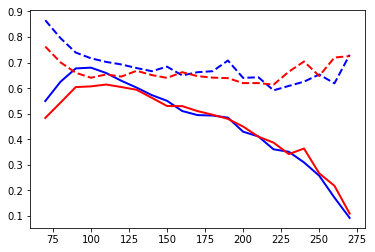

In [22]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(flexible_times, np.mean(r_sites_fixed_1[3,list_acceptable_neurons_1,:],0), lw=2, ls='-', color='b')
plt.plot(flexible_times, np.mean(r_sites_flexible_1[3,list_acceptable_neurons_1,:], 0), lw=2, ls='--', color = 'b')

plt.plot(flexible_times, np.mean(r_sites_fixed_2[3,list_acceptable_neurons_2,:],0), lw=2, ls='-', color = 'r')
plt.plot(flexible_times, np.mean(r_sites_flexible_2[3,list_acceptable_neurons_2,:], 0), lw=2, ls='--', color = 'r')

In [7]:
r2XAB = (r2AX +r2BX -2*np.sqrt(r2AX)*np.sqrt(r2BX)*rAB)/(1-np.square(rAB))